<b> TRAVEL PURCHASE PREDICTION

In [1]:
#INSTALLING ALL THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot
import seaborn as sns
from numpy import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.tree as tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#READING CSV FORMATTED FILE WHILE SAVING IT INTO A DATAFRAME "df"
df= pd.read_csv("/content/Tourism.csv")

In [3]:
#PRINTING FIRST FIVE ROWS FROM THE WHOLE DATASET
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**Description of columns present in the dataset:**
* **CustomerID**: Unique customer ID
* **ProdTaken**: Whether the customer has purchased a package or not (0: No, 1: Yes)
* **Age**: Age of customer
* **TypeofContact**: How customer was contacted (Company Invited or Self Inquiry)
* **CityTier**: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* **Occupation**: Occupation of customer
* **Gender**: Gender of customer
* **NumberOfPersonVisiting**: Total number of persons planning to take the trip with the customer
* **PreferredPropertyStar**: Preferred hotel property rating by customer
* **MaritalStatus**: Marital status of customer
* **NumberOfTrips**: Average number of trips in a year by customer
* **Passport**: The customer has a passport or not (0: No, 1: Yes)
* **OwnCar**: Whether the customers own a car or not (0: No, 1: Yes)
* **NumberOfChildrenVisiting**: Total number of children with age less than 5 planning to take.

In [4]:
df.shape

(4888, 20)

The dataset contains 4888 rows and 20 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Above dataset contains 4888 rows*20 columns. Here, 14 columns contain either 'float' or 'int' datatype and rest contains 'object' datatype. Moreover, our target column 'ProdTaken' contains binary value.

In [6]:
#COMPLETE STATISTICAL DESCRIPTION OF THE GIVEN DATASET
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


**Statistical interpretation**

1. All the 'CustomerID' have unique values.
2. 'ProdTaken' contains only two values(that is, either product can be taken by the customer(represented as 1) or not taken by the customer(represented as 0)).
3. 'Age' column has mean value of 37.6 years ~ 38 years, where the minimum value of a customer starts from 18 years and ends at 61 years.
4. 'CityTier' contains 3 unique values: Tier1, Tier2, Tier3.
5. 'Duration of Pitch' column contains minimum value of 5 and maximum value of 127 along with standard deviation of 8.51. This shows that there is a huge variation in this column.
6. Maximum number of person visiting is 3 per package.
7. 50% of the time, only 4 followups are possible.
8. 'PreferredPropertyStar' has only values 3, 4 and 5.
9. There are maximum 22 number of trips per person and minimum of 1 trip per person within that package.
10. Most of the people have no passport, shows maximum people comes from within that country.
11. Further, maximum of 3 kids visit in a single package.
12. 'MonthlyIncomeofPeople' visited there:
  * Lowest of 1000 per month.
  * Highest of 98678 per month.
  * 50% from the dataset has income of 22347 per month.
  * Mean value of Income is 23619 per month.



In [7]:
df[["TypeofContact","Occupation","Gender","ProductPitched","MaritalStatus","Designation"]].describe(include="all")

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


Above statistics show:


1.   There are two unique values in the column 'TypeofContact' where most occuring category 'Self Enquiry' comes almost 70.8% ~ 71% in the provided dataset.
2.   Four types of 'Occupation' are present in the dataset with highly repetitive 'Salaried' of count 2368.
3. 'Male' Gender dominates 'female' and the other one, with a high frequency of 2916. Overall, "Gender" column contains 3 different categories.
4. 'Basic' category has been found most (1842 times) in 'ProductPitched' column, where the column itself has 5 different categories.
5. Four unique types can be observed in the column 'MaritalStatus' where 'Married' people occured most(2340 from 4388) in the dataset.
6. 'Designation' category consists of 5 unique values where 'Executive' captured most of the part(41.9% ~ 42%) from that column.



In [8]:
df.shape

(4888, 20)

In [9]:
#Product taken by the customer(Yes= 1, No= 0) with respect to their Designation
df[["Designation","ProdTaken"]].value_counts()

Designation     ProdTaken
Manager         0            1528
Executive       0            1290
Senior Manager  0             618
Executive       1             552
AVP             0             322
VP              0             210
Manager         1             204
Senior Manager  1             124
AVP             1              20
VP              1              20
Name: count, dtype: int64

**Above statistics depict:**

This shows that In most of the cases, product has not been taken by the customer irrespective of their Designation. Further, Managers and Executives make a big amount(71.1%) in the dataset, where product not been taken by the customers. On the other hand, Executives and Managers are also the one who played a key role(82.1%) from overall Package being purchased .


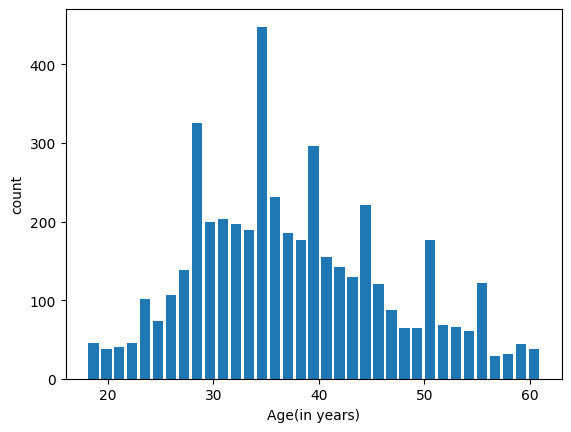

In [10]:
# Visual representation of Age count in the whole dataset.
import matplotlib.pyplot as plt
plt.hist(df.Age,bins=35, rwidth= 0.8)
plt.xlabel("Age(in years)")
plt.ylabel("count")
plt.show()

**Above shows:**

* Most occuring age: 35

* People of 30-40 years are more active in buying this travel package.

* People after 55 years are not contributing much in buying this package.

* Overall, the graph follows almost Normal distribution.

In [11]:
# STATISTICAL CHECK OF ABOVE VISUAL

df["Age"].value_counts().head(10)

#represent Top 10 Age value that shows high contribution in buying this package.

Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
Name: count, dtype: int64

In [12]:
# STATISTICAL CHECK OF ABOVE VISUAL

df["Age"].value_counts().tail(10)

#represent last 10 Age value that shows less contribution in buying this package

Age
23.0    46
59.0    44
21.0    41
20.0    38
19.0    32
58.0    31
57.0    29
60.0    29
18.0    14
61.0     9
Name: count, dtype: int64

<Axes: xlabel='ProdTaken', ylabel='count'>

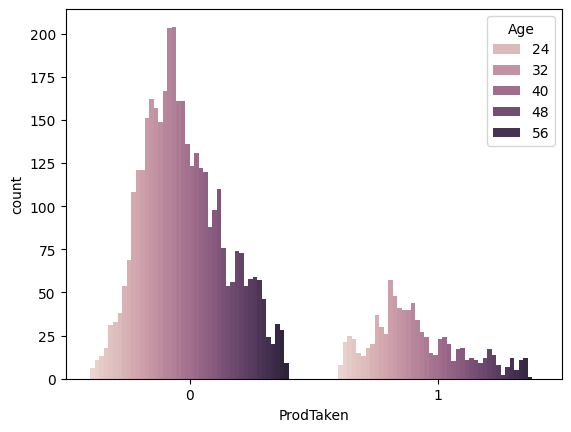

In [13]:
sns.countplot(hue="Age", x="ProdTaken", data=df)

**Above plot shows:**

Irrespective of the age groups, most of the customers come under ProdTaken=0 or customers who are not purchasing package.

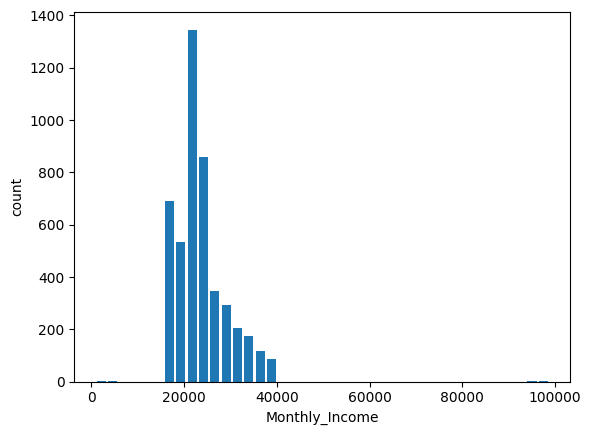

In [14]:
# Histograph count of  Monthly income.
plt.hist(df.MonthlyIncome,bins=40, rwidth= 0.8)
plt.xlabel("Monthly_Income")
plt.ylabel("count")
plt.show()

**This shows:**
* Data is not normally distributed as most of the values lies from 15000 to 40000.


In [15]:
# STATISTICAL CHECK OF ABOVE VISUAL

df["MonthlyIncome"].value_counts().head(10)

# represent top 10 MonthlyIncome with their count who bought this package.

MonthlyIncome
20855.0    7
21288.0    7
17342.0    7
21020.0    7
24950.0    6
17559.0    6
21419.0    6
21237.0    6
17741.0    6
21347.0    6
Name: count, dtype: int64

In [16]:
# Minimum value of Monthly Income present in the given dataset.
df.MonthlyIncome.min()

1000.0

In [17]:
# Maximum value of Monthly Income present in the given dataset.
df.MonthlyIncome.max()

98678.0

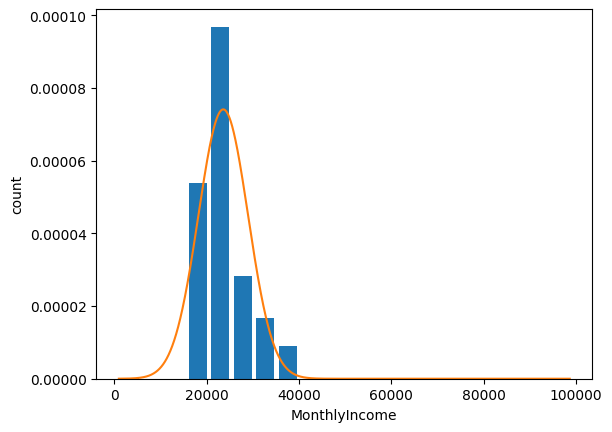

In [18]:
# Kernel Density Estimation(KDE) representation of MonthlyIncome with respect to its count.
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df.MonthlyIncome,bins=20, rwidth= 0.8, density= True)
plt.xlabel("MonthlyIncome")
plt.ylabel("count")

rng= np.arange(df.MonthlyIncome.min(), df.MonthlyIncome.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.MonthlyIncome.mean(), df.MonthlyIncome.std()))

<Axes: xlabel='ProdTaken', ylabel='MonthlyIncome'>

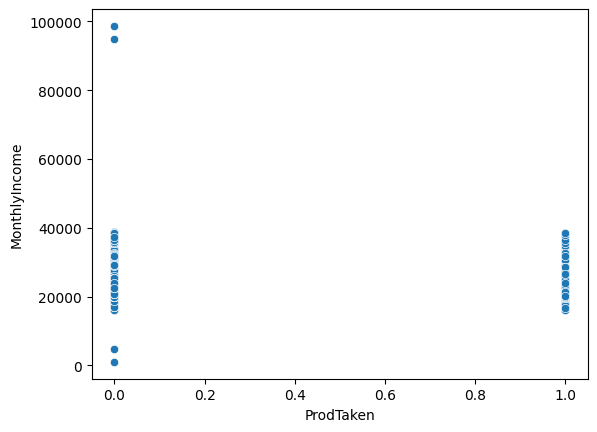

In [19]:
sns.scatterplot(y="MonthlyIncome", x= "ProdTaken", data= df)

**Above result shows:**

 * Higher proportion of customers doesn't purchase the package.

* It doesn't depends much on the salary whether the customer purchases the package or not.

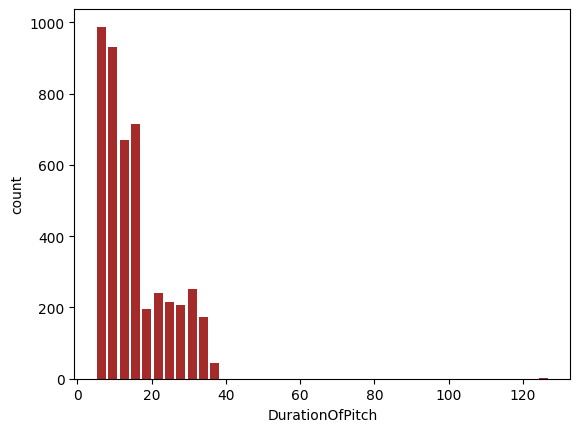

In [20]:
# Histogram count of 'DurationOfPitch' column
plt.hist(df.DurationOfPitch,bins=40, rwidth= 0.8,color="brown")
plt.xlabel("DurationOfPitch")
plt.ylabel("count")
plt.show()

**Above shows:**

* Distribution of data is right-skewed.

In [21]:
#STATISTICAL CHECK OF ABOVE VISUAL

df["DurationOfPitch"].value_counts().head(10)

# represent top 10 DurationOfPitch with their count.

DurationOfPitch
9.0     483
7.0     342
8.0     333
6.0     307
16.0    274
15.0    269
14.0    253
10.0    244
13.0    223
11.0    205
Name: count, dtype: int64

<Axes: xlabel='ProdTaken', ylabel='count'>

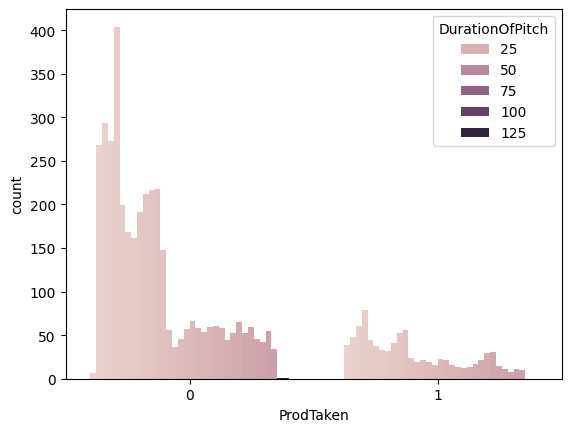

In [22]:
sns.countplot(hue="DurationOfPitch", x="ProdTaken", data=df)

**Above result shows:**
* Duration of Pitch with value more than 600 has also not bought the package.

* In a nutshell, Even with high duration of pitch, people doesn't show much interest in purchasing the package.

In [23]:
df[["ProdTaken","DurationOfPitch"]].value_counts()

ProdTaken  DurationOfPitch
0          9.0                404
           7.0                294
           8.0                273
           6.0                268
           16.0               218
                             ... 
1          36.0                10
           34.0                 8
0          5.0                  6
           127.0                1
           126.0                1
Name: count, Length: 65, dtype: int64

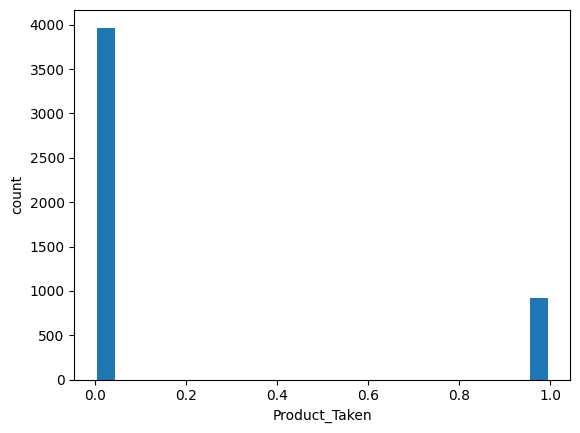

In [24]:
# Histogram count of 'ProdTaken'(TARGET COLUMN)
plt.hist(df.ProdTaken,bins=20, rwidth= 0.8)
plt.xlabel("Product_Taken")
plt.ylabel("count")
plt.show()

**Above result shows:**
ProdTaken column contains only two values(0 or 1), where most of the values are 0.

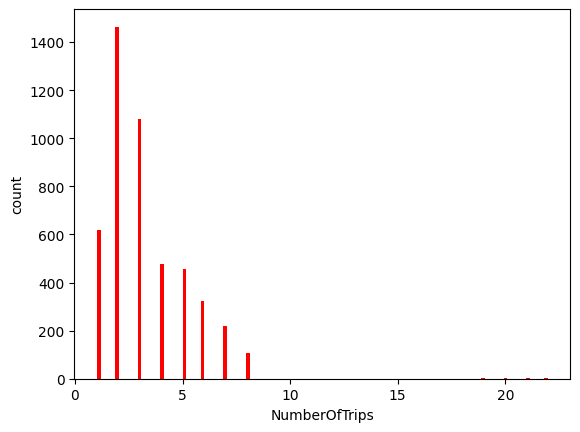

In [25]:
# Histogram count of 'NumberOfTrips' column
/
plt.hist(df.NumberOfTrips,bins=100, rwidth= 0.8,color="red")
plt.xlabel("NumberOfTrips")
plt.ylabel("count")
plt.show()

**Above result shows:**
* The data is skewed, where Mode(most frequent number) is 2.
* Maximum number of the trips are within 0 to 10

In [26]:
# STATISTICAL CHECK OF ABOVE VISUAL

df["NumberOfTrips"].value_counts()

# represent how many time trips have been taken by an individual.

NumberOfTrips
2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: count, dtype: int64

<Axes: xlabel='ProdTaken', ylabel='NumberOfTrips'>

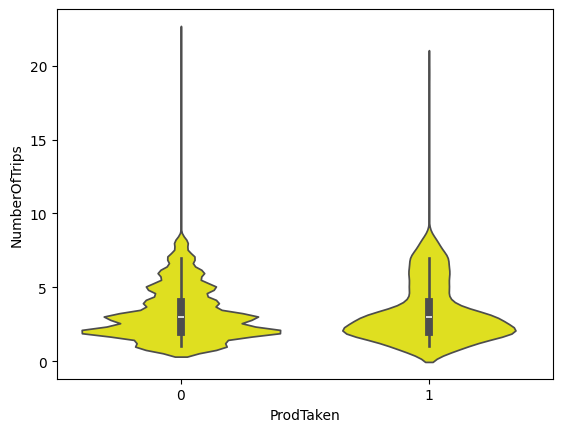

In [27]:
# Violinplot representation for 'ProdTaken' vs 'NumberOfTrips'
sns.violinplot(x= "ProdTaken", y= "NumberOfTrips", data=df,color="yellow")

**Above result shows:**
Most of the data lies in 2 and 3, where the median(middle value) is 3.

**NOTE:**
Violin plot allows to visualize the distribution of a numeric variable for one or several categories. Each 'violin' represents a group or a variable. The shape represents the density estimate of the variable: the more data points in a specific range, the larger the violin is for that range.


---


Source: data-to-viz.com

In [28]:
# STATISTICAL CHECK OF ABOVE VISUAL

df[["ProdTaken", "NumberOfTrips"]].median()

# represent median of 'ProdTaken' vs 'NumberOfTrips'

ProdTaken        0.0
NumberOfTrips    3.0
dtype: float64

In [29]:
# STATISTICAL CHECK OF ABOVE VISUAL

df[["ProdTaken","NumberOfTrips"]].value_counts()

# represent count of 'ProdTaken' vs 'NumberOfTrips'

ProdTaken  NumberOfTrips
0          2.0              1165
           3.0               862
           1.0               508
           4.0               417
           5.0               396
1          2.0               299
0          6.0               258
1          3.0               217
0          7.0               156
1          1.0               112
0          8.0                76
1          6.0                64
           5.0                62
           7.0                62
           4.0                61
           8.0                29
0          22.0                1
           21.0                1
1          19.0                1
           20.0                1
Name: count, dtype: int64

<Axes: xlabel='ProdTaken', ylabel='MonthlyIncome'>

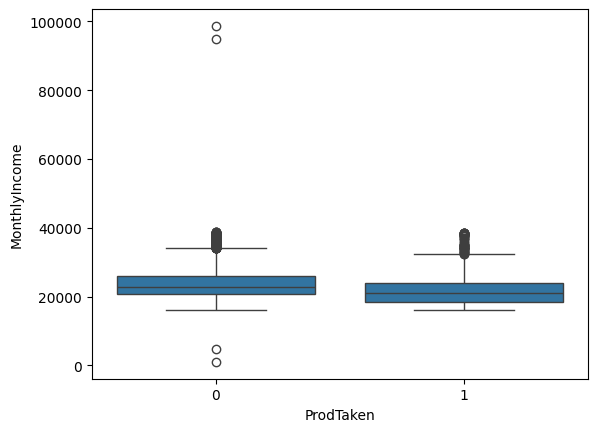

In [30]:
#Boxplot representation of 'ProdTaken' vs 'MonthlyIncome'
sns.boxplot(x= "ProdTaken",y="MonthlyIncome", data=df)

**Above boxplot shows:**

* ProdTaken 0 weighs more than ProdTaken 1.  
* There are some outliers(data points that are far apart from the other values in the dataset or abnormal values) in case of ProdTaken 0.

**NOTE:**

Box plots provide a quick visual summary of the variability of values in a dataset. They show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset. Outliers can reveal mistakes or unusual occurrences in data.

---
Source: arcgis.com


In [31]:
# STATISTICAL CHECK OF ABOVE VISUAL

df[["MonthlyIncome","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'MonthlyIncome'

MonthlyIncome  ProdTaken
20855.0        0            7
18452.0        0            6
21020.0        0            6
25025.0        0            6
21347.0        0            6
                           ..
22545.0        1            1
               0            1
22516.0        0            1
22510.0        0            1
98678.0        0            1
Name: count, Length: 2694, dtype: int64

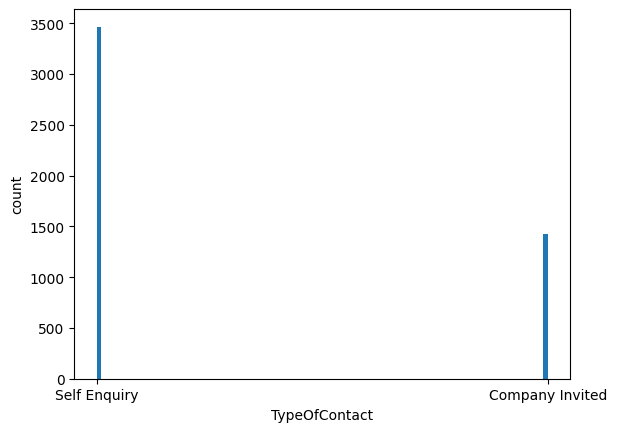

In [199]:
plt.hist(df.TypeofContact,bins=100, rwidth= 4.0)
plt.xlabel("TypeOfContact")
plt.ylabel("count")
plt.show()

**Above result shows:**

"Self Enquiry" engagement > "Company Invited" engagement

In [37]:
# Count of attributes present in 'TypeOfContact'
df.TypeofContact.value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

<Axes: xlabel='TypeofContact', ylabel='count'>

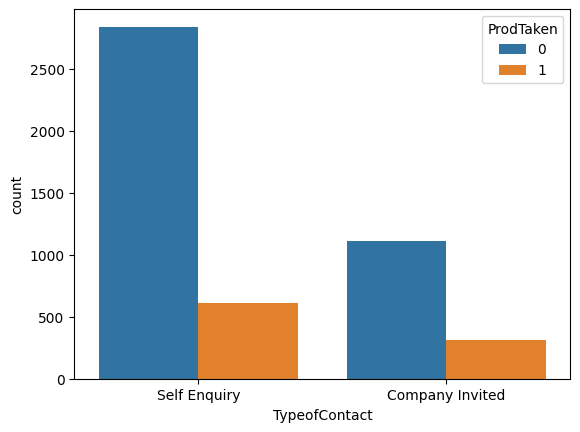

In [38]:
#Calculation of "TypeofContact" vs "ProdTaken"
sns.countplot(x="TypeofContact",hue= "ProdTaken",data=df)

**Above result shows:**

 * 'Self enquiry' Type of Contact are more active in purchasing the package with value of almost 600, than the 'Company Invited' Type of Contact with value nearly 400.

 * Most of the time, product has not been purchased by both of the contacts with values approximately 2800 and 1100 respectively.

 * Overall, 'Self Enquiry' type of contact plays more role over 'Company Invited' type of contact.

In [39]:
# STATISTICAL CHECK OF ABOVE VISUAL

df[["TypeofContact","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'TypeofContact'

TypeofContact    ProdTaken
Self Enquiry     0            2837
Company Invited  0            1109
Self Enquiry     1             607
Company Invited  1             310
Name: count, dtype: int64

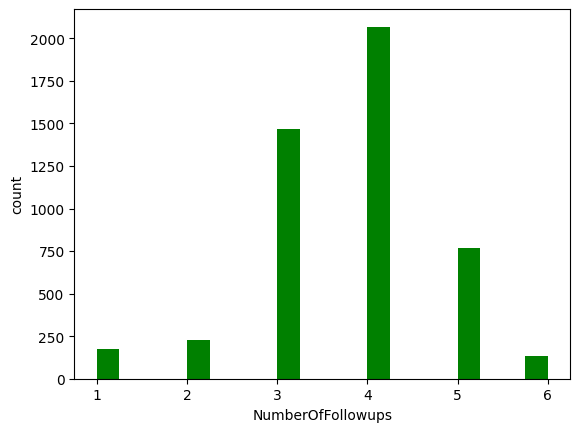

In [40]:
# Histogram count plot for of NumberOfFollowups
plt.hist(df.NumberOfFollowups,bins=20, rwidth= 4.8,color="green")
plt.xlabel("NumberOfFollowups")
plt.ylabel("count")
plt.show()

**Above result shows:**

* Most of the followups consist : 3 or 4 or 5.

<Axes: xlabel='NumberOfFollowups', ylabel='count'>

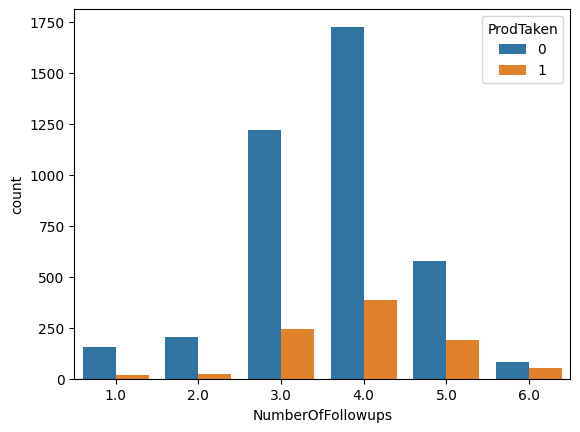

In [200]:
# Comparison between "NumberOfFollowups" and "ProdTaken"
sns.countplot(x="NumberOfFollowups",hue = "ProdTaken", data=df)

**Above result shows:**

As the number of followups increase, the chances of product being purchased from the customer increases.

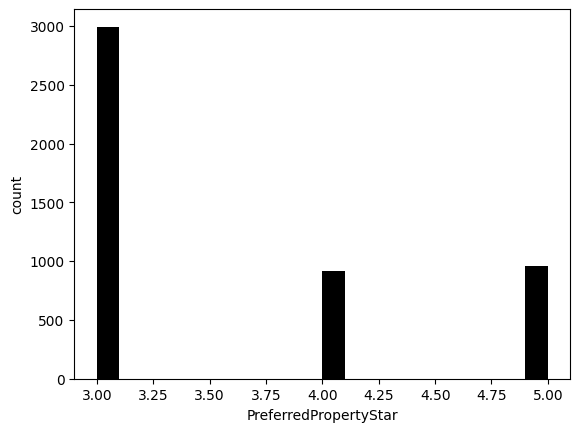

In [42]:
plt.hist(df.PreferredPropertyStar,bins=20, rwidth= 3.8,color="black")
plt.xlabel("PreferredPropertyStar")
plt.ylabel("count")
plt.show()

**Above result shows:**

Most of the customers give 3 Stars even when the product is purchase by the customer or even not.

<Axes: xlabel='PreferredPropertyStar', ylabel='count'>

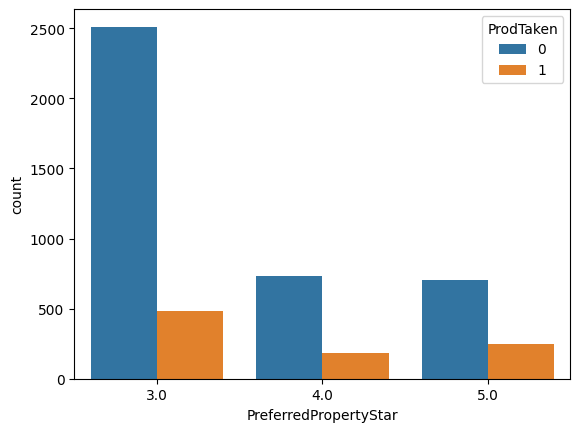

In [43]:
sns.countplot(x="PreferredPropertyStar" , hue="ProdTaken", data = df)

**Above result shows:**

As the "PreferredPropertyStar" score increases, package being purchased by the customers also increases.

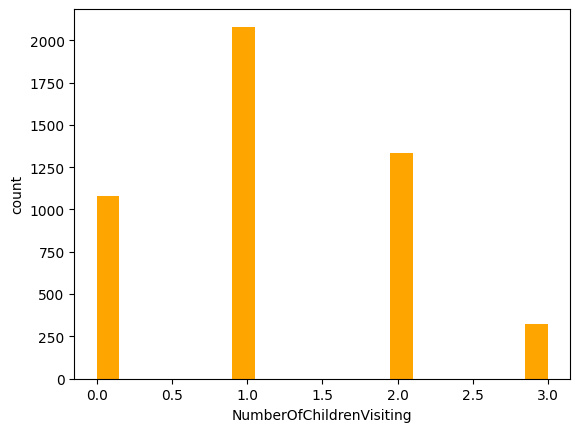

In [44]:
#Histogram count of NumberOfChildrenVisiting
plt.hist(df.NumberOfChildrenVisiting,bins=20, rwidth= 4.8,color="orange")
plt.xlabel("NumberOfChildrenVisiting")
plt.ylabel("count")
plt.show()

**Above result shows:**

Most of the time customers come along with a single child.

In [45]:
#STATISTICAL CHECK OF ABOVE VISUAL

df.NumberOfChildrenVisiting.value_counts()

# represent count of 'NumberOfChildrenVisiting'

NumberOfChildrenVisiting
1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: count, dtype: int64

<Axes: xlabel='NumberOfChildrenVisiting', ylabel='count'>

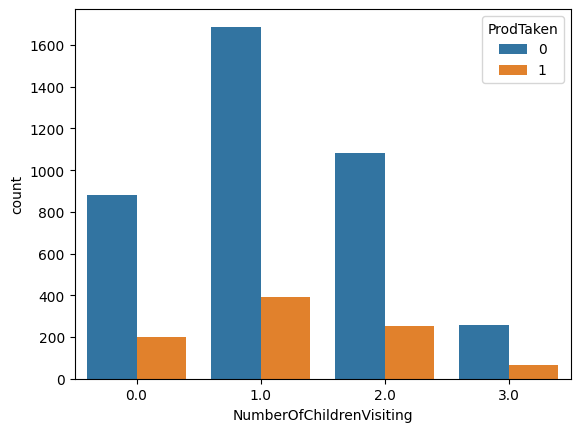

In [46]:
#Comparison between "NumberOfChildrenVisiting" and "ProdTaken"
sns.countplot(x="NumberOfChildrenVisiting",hue = "ProdTaken", data=df)

In [47]:
#STATISTICAL CHECK OF ABOVE VISUAL

df[[ "NumberOfChildrenVisiting","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'NumberOfChildrenVisiting'

NumberOfChildrenVisiting  ProdTaken
1.0                       0            1688
2.0                       0            1082
0.0                       0             880
1.0                       1             392
3.0                       0             259
2.0                       1             253
0.0                       1             202
3.0                       1              66
Name: count, dtype: int64

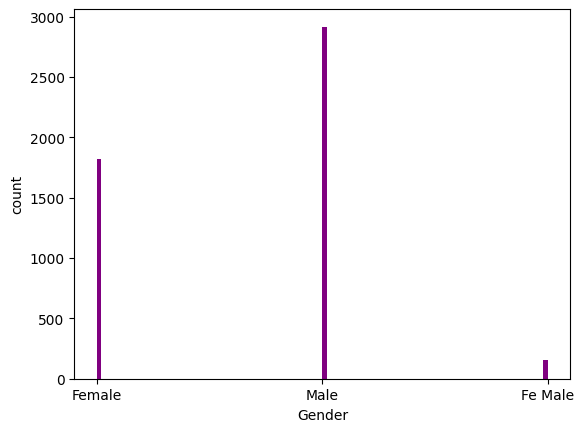

In [48]:
#Histogram count of "Gender"
plt.hist(df.Gender,bins=100, rwidth= 4.8,color="purple")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

In [49]:
#STATISTICAL CHECK OF ABOVE VISUAL

df.Gender.value_counts()

# represent count of 'Gender'

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

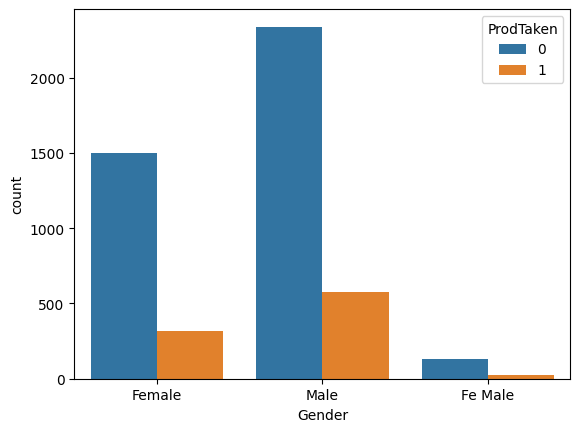

In [50]:
#Comparison between "Gender" and "ProdTaken"
sns.countplot(x="Gender",hue="ProdTaken",data=df)

In [51]:
#STATISTICAL CHECK OF ABOVE VISUAL

df[[ "Gender","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'Gender'

Gender   ProdTaken
Male     0            2338
Female   0            1500
Male     1             578
Female   1             317
Fe Male  0             130
         1              25
Name: count, dtype: int64

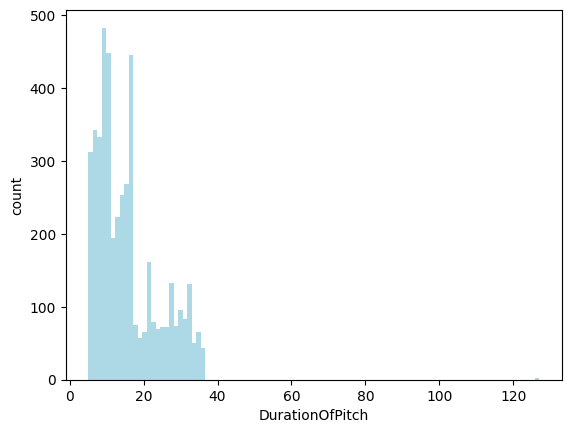

In [52]:
#Histogram count of DurationOfPitch
plt.hist(df.DurationOfPitch,bins=100, rwidth= 4.8,color="lightblue")
plt.xlabel("DurationOfPitch")
plt.ylabel("count")
plt.show()

**Above result shows:**

9.0 "DurationOfPitch" is the most occuring duration in the dataset with frequency of approximately 730.

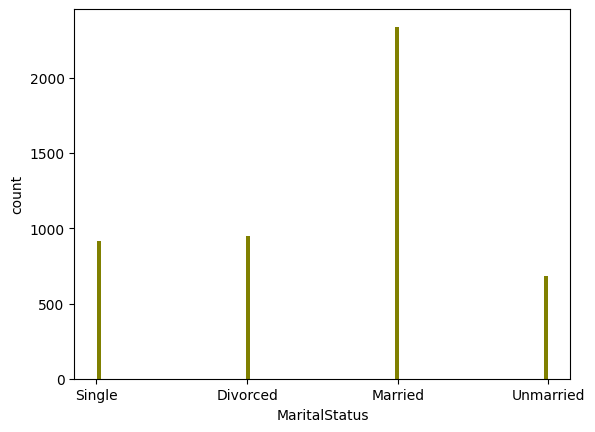

In [53]:
#Histogram count of "MaritalStatus"
plt.hist(df.MaritalStatus,bins=100, rwidth= 0.8,color="olive")
plt.xlabel("MaritalStatus")
plt.ylabel("count")
plt.show()

In [54]:
#STATISTICAL CHECK OF ABOVE VISUAL

df.MaritalStatus.value_counts()

# represent count of 'MaritalStatus'

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

<Axes: xlabel='MaritalStatus', ylabel='count'>

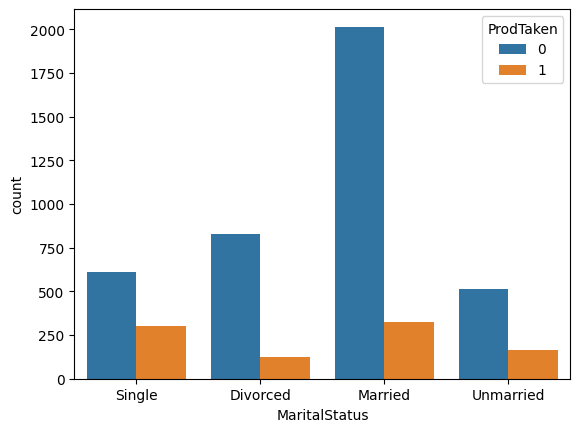

In [55]:
#Comparison between "MaritalStatus" and "ProdTaken"
sns.countplot(x="MaritalStatus",hue="ProdTaken", data= df)

**Above result shows:**

* "Married" category contributed more than rest of the categories within this dataset.

* "Single" and"Unmarried" people with ratios of 2:1 and 3:1 are the ones who purchases the package most than rest of the categories.

  * **NOTE:** 2:1 above shows that with every 3 individual, 2 is not purchasing the package and only one is purchasing the package .


In [56]:
# STATISTICAL CHECK OF ABOVE VISUAL

df[["MaritalStatus","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'MaritalStatus'

MaritalStatus  ProdTaken
Married        0            2014
Divorced       0             826
Single         0             612
Unmarried      0             516
Married        1             326
Single         1             304
Unmarried      1             166
Divorced       1             124
Name: count, dtype: int64

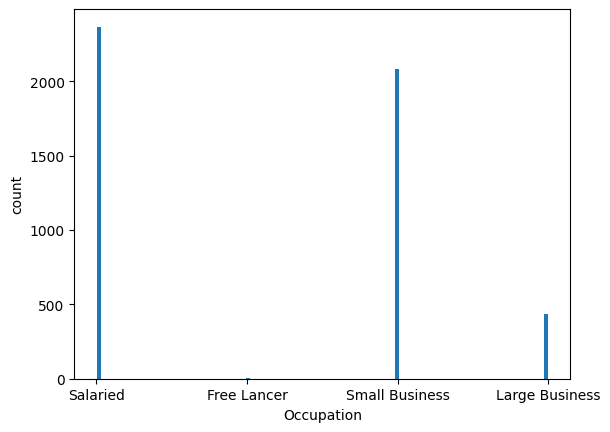

In [57]:
#Histogram count of "Occupation"
plt.hist(df.Occupation,bins=100, rwidth= 0.8)
plt.xlabel("Occupation")
plt.ylabel("count")
plt.show()

**Above result shows:**

"Salaried" customers play a major role in contributing within this dataset.

In [58]:
#STATISTICAL CHECK OF ABOVE VISUAL

df.Occupation.value_counts()

# represent count of 'Occupation'

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

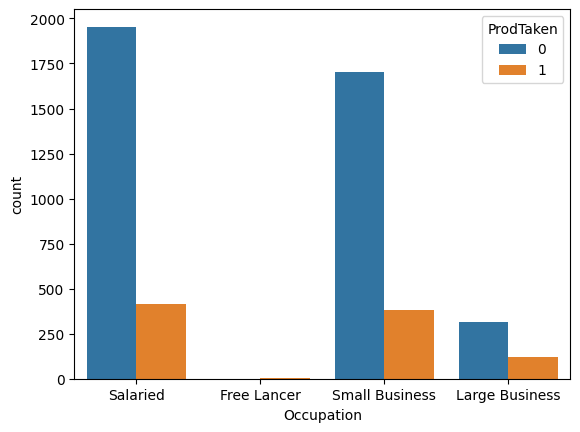

In [59]:
#Comparison between "Occupation" and "ProdTaken"
sns.countplot(x="Occupation",hue="ProdTaken", data= df)

**Above result shows:**

* "Free Lancer" is the only category from the Occupation column that has always bought the package within this dataset.

* "Large Business" customers show more interest in purchasing the product with ratio of 3:1 from their overall numbers than rest, who shows ratio of 4:1("Small Business") and 5:1("Salaried") respectively.
   * **NOTE:** Above 3:1 shows that with every four individual, 3 of them are not buying the package whereas only 1 of them is buying the package.

In [60]:
# STATISTICAL CHECK OF ABOVE VISUAL

df[["Occupation","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'Occupation'

Occupation      ProdTaken
Salaried        0            1954
Small Business  0            1700
Salaried        1             414
Small Business  1             384
Large Business  0             314
                1             120
Free Lancer     1               2
Name: count, dtype: int64

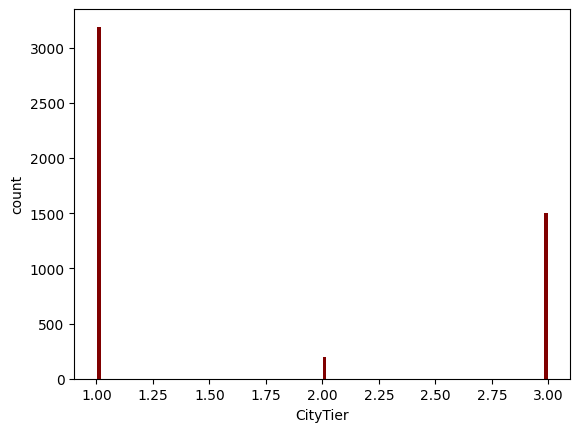

In [61]:
#Histogram count of "CityTier"
plt.hist(df.CityTier,bins=100, rwidth= 0.8,color="maroon")
plt.xlabel("CityTier")
plt.ylabel("count")
plt.show()

**Above result shows:**
 Tier1> Tier3> Tier2

In [62]:
# STATISTICAL CHECK OF ABOVE VISUAL

df.CityTier.value_counts()

# represent count of 'CityTier'

CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

<Axes: xlabel='CityTier', ylabel='count'>

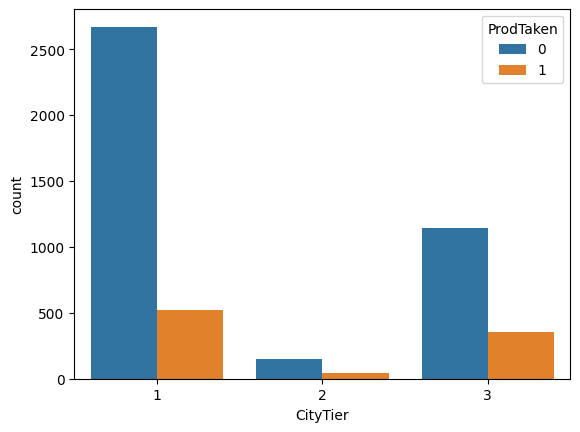

In [63]:
#Comparison between "CityTier" and "ProdTaken"
sns.countplot(x="CityTier",hue="ProdTaken", data= df)

**Above result shows:**

* Even though the participation of Tier1 is more than others within this dataset, but product taken by the customers are more in the case of Tier2 and Tier3 than Tier1.

In [64]:
# STATISTICAL CHECK OF ABOVE VISUAL

df[[ "CityTier","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'CityTier'

CityTier  ProdTaken
1         0            2670
3         0            1146
1         1             520
3         1             354
2         0             152
          1              46
Name: count, dtype: int64

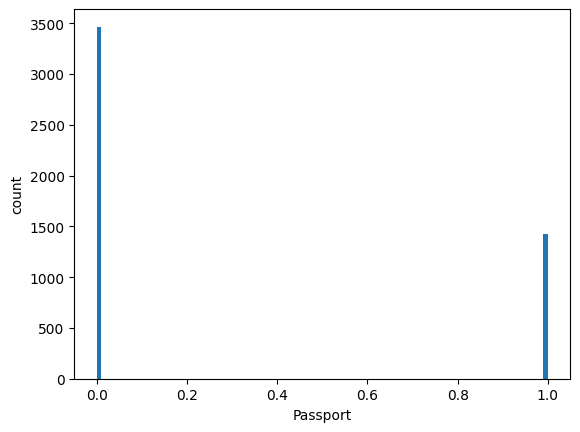

In [65]:
#Histogram count of "Passport"
plt.hist(df.Passport,bins=100, rwidth= 3.8)
plt.xlabel("Passport")
plt.ylabel("count")
plt.show()

**Above result shows:**

* Most of the people within this dataset don't carry any Passport.

In [66]:
# STATISTICAL CHECK OF ABOVE VISUAL

df.Passport.value_counts()

# represent count of 'Passport'

Passport
0    3466
1    1422
Name: count, dtype: int64

<Axes: xlabel='Passport', ylabel='count'>

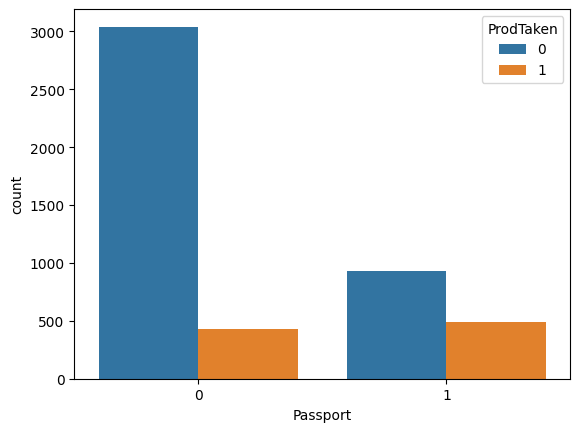

In [67]:
# Comparison between "Passport" and "ProdTaken"
sns.countplot(x="Passport",hue="ProdTaken", data= df)

**Above result shows:**

* Customers who carry passport are more willing to buy the package with ratio of almost 2:1 than who don't carry with ratio of almost 7:1.
  * **NOTE:** Above 2:1 means that with every 3 individual, two of them are not buying the package while rest 1 is buying the package.

In [68]:
#STATISTICAL CHECK OF ABOVE VISUAL

df[[ "Passport","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'Passport'

Passport  ProdTaken
0         0            3040
1         0             928
          1             494
0         1             426
Name: count, dtype: int64

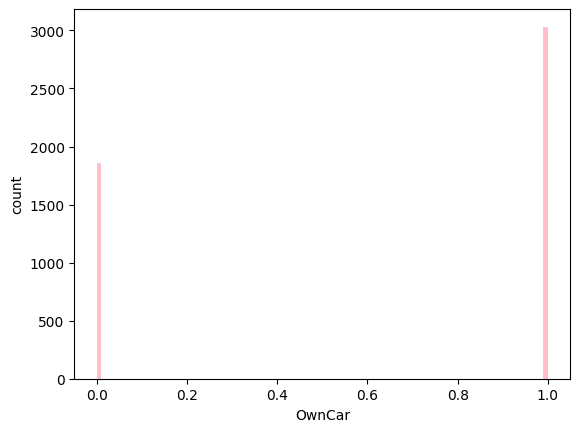

In [69]:
#Histogram count of "OwnCar"
plt.hist(df.OwnCar,bins=100, rwidth= 3.8,color="pink")
plt.xlabel("OwnCar")
plt.ylabel("count")
plt.show()

**Above result shows:**

* Most of the customer owns car.

In [70]:
#STATISTICAL CHECK OF ABOVE VISUAL

df.OwnCar.value_counts()

# represent count of 'OwnCar'

OwnCar
1    3032
0    1856
Name: count, dtype: int64

<Axes: xlabel='OwnCar', ylabel='count'>

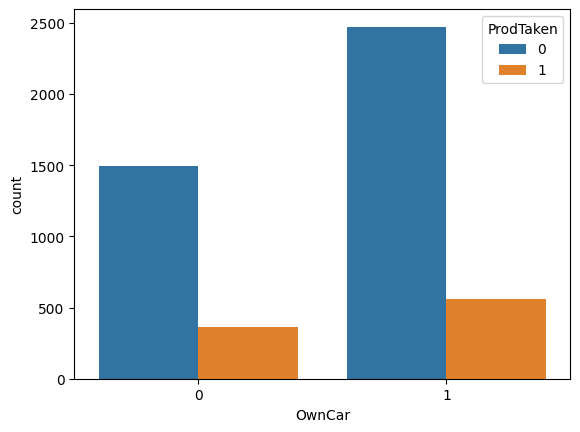

In [71]:
#Comparison between "OwnCar" and "ProdTaken"
sns.countplot(x="OwnCar",hue="ProdTaken", data= df)

**Above result shows:**

* Interestingly, Customer who doesn't own any car shows more interest in buying the package from its overall count with ratio of 4.1:1 than who owns car with ratio of 4.5:1.
  * **NOTE:** Above 4.1:1 means, with every 5 or 6 individuals, atmost 4 is purchasing the product and rest is not.

In [72]:
#STATISTICAL CHECK OF ABOVE VISUAL

df[[ "OwnCar","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'OwnCar'

OwnCar  ProdTaken
1       0            2472
0       0            1496
1       1             560
0       1             360
Name: count, dtype: int64

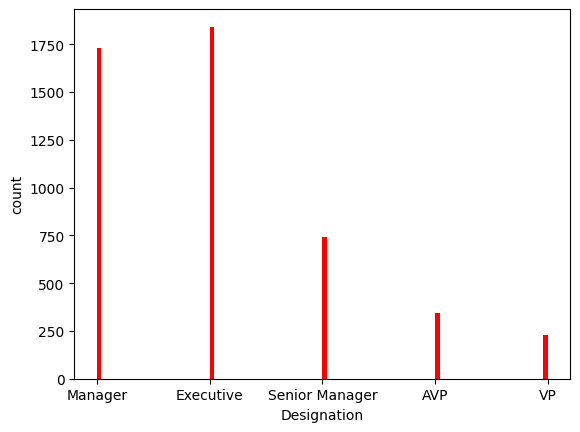

In [73]:
#Histogram count of "Designation"
plt.hist(df.Designation,bins=100, rwidth= 3.8,color= "red")
plt.xlabel("Designation")
plt.ylabel("count")
plt.show()

**Above result shows:**

* "Executive" and "Manager" categories are more frequent within this dataset.

In [74]:
# STATISTICAL CHECK OF ABOVE VISUAL

df.Designation.value_counts()

# represent count of 'Designation'

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

<Axes: xlabel='Designation', ylabel='count'>

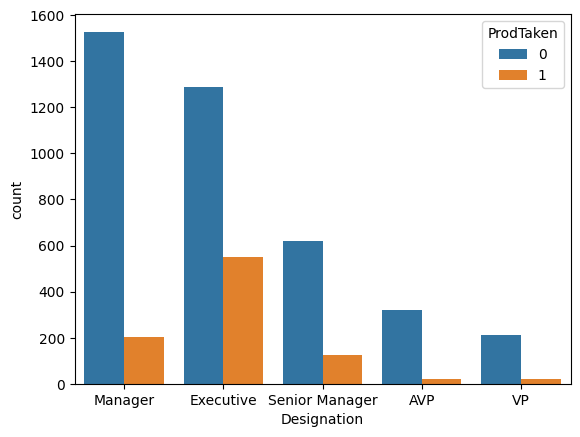

In [75]:
#Comparison between "Designation" and "ProdTaken"
sns.countplot(x="Designation",hue="ProdTaken", data= df)

**Above result shows:**

* Executive shows more interest in buying the package  with ratio of almost 2:1 than others with ratio of 7:1[for Manager], 5:1[for Senior Manager], 16:1[for AVP] and 10:1[for VP] respectively.
  * **NOTE:** Above 16:1 means with every 17 individual, 16 of them are not buying the package while only 1 is buying the package.

In [76]:
#STATISTICAL CHECK OF ABOVE VISUAL

df[[ "Designation","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'Designation'

Designation     ProdTaken
Manager         0            1528
Executive       0            1290
Senior Manager  0             618
Executive       1             552
AVP             0             322
VP              0             210
Manager         1             204
Senior Manager  1             124
AVP             1              20
VP              1              20
Name: count, dtype: int64

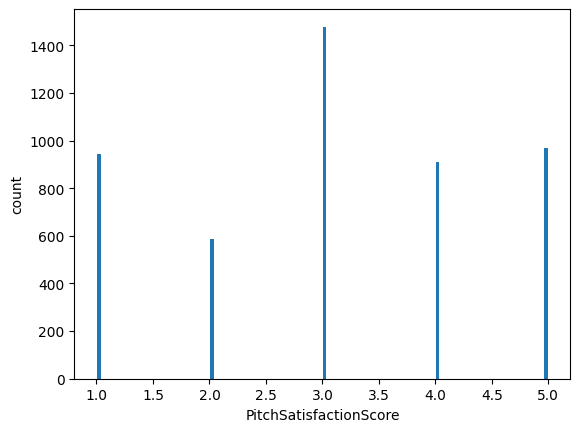

In [77]:
#Histogram count of "PitchSatisfactionScore"
plt.hist(df.PitchSatisfactionScore,bins=100, rwidth= 0.8)
plt.xlabel("PitchSatisfactionScore")
plt.ylabel("count")
plt.show()

**Above result shows:**

* 3.0 PitchSatisfactionScore is more repetitive in the dataset.

In [78]:
#STATISTICAL CHECK OF ABOVE VISUAL

df.PitchSatisfactionScore.value_counts()

# represent count of 'PitchSatisfactionScore'

PitchSatisfactionScore
3    1478
5     970
1     942
4     912
2     586
Name: count, dtype: int64

<Axes: xlabel='PitchSatisfactionScore', ylabel='count'>

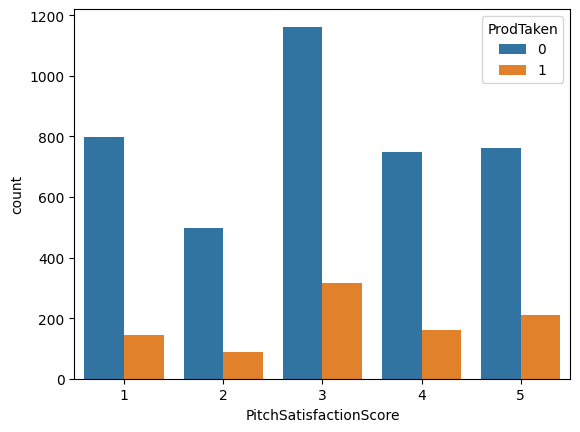

In [79]:
#Comparison between "PitchSatisfactionScore" and "ProdTaken"
sns.countplot(x="PitchSatisfactionScore",hue="ProdTaken", data= df)

**Above result shows:**

1. Customers giving PitchSatisfactionScore of 3.0 and 5.0 are more involved in buying the package from their overall counts, with ratio of almost 3.6:1 and 3.67:1 respectively.

2. Customers giving PitchSatisfactionScore of 1.0, 2.0 and 4.0 are less involved in buying the package from their overall counts, with ratio of almost 5.5:1, 5.65:1 and 4.62:1 respectively.

  * **NOTE:** From 1, 3.6:1 means with every 5 or 6 individual, atmost 4 is not buying the package and rest only 1 is buying the package in the dataset.

In [80]:
#STATISTICAL CHECK OF ABOVE VISUAL

df[[ "PitchSatisfactionScore","ProdTaken"]].value_counts()

# represent count of 'ProdTaken' vs 'PitchSatisfactionScore'

PitchSatisfactionScore  ProdTaken
3                       0            1162
1                       0             798
5                       0             760
4                       0             750
2                       0             498
3                       1             316
5                       1             210
4                       1             162
1                       1             144
2                       1              88
Name: count, dtype: int64

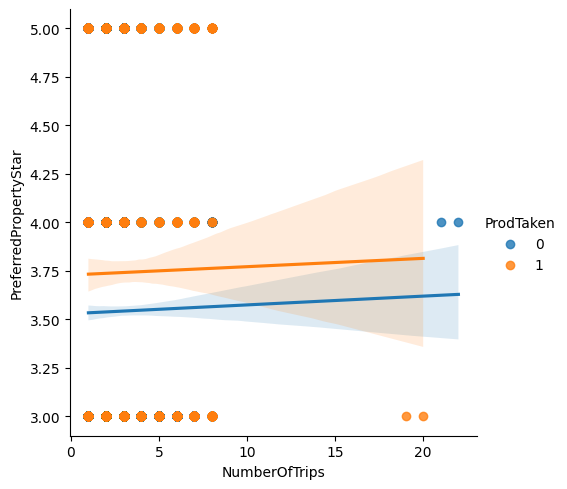

In [81]:
sns.lmplot(x="NumberOfTrips",y= "PreferredPropertyStar",hue="ProdTaken", data= df)

**Above result shows:**
* Customers with 5.0 "PreferredPropertyStar" possess smaller to medium Trip counts(between 0 to 10). In this case, the chances of product taken by a customer is high.

* Conversely, Customers with 4.0 "PreferredPropertyStar" possess smaller to high Trip counts(that is, number of trips between 0 to 10 and number of trips >15). In this case, the chances of product taken by a customer differs where most of them buys the package and rest of them not.

* Moreover,between 3.0 - 4.0 "PreferredPropertyStar", customers take either low(0-10) trips or high(18-20) trips.

* At the end, one can also observe the straight line in the above plot, which shows that there is a slight positive association between "PreferredPropertyStar" and "NumberOfTrips".

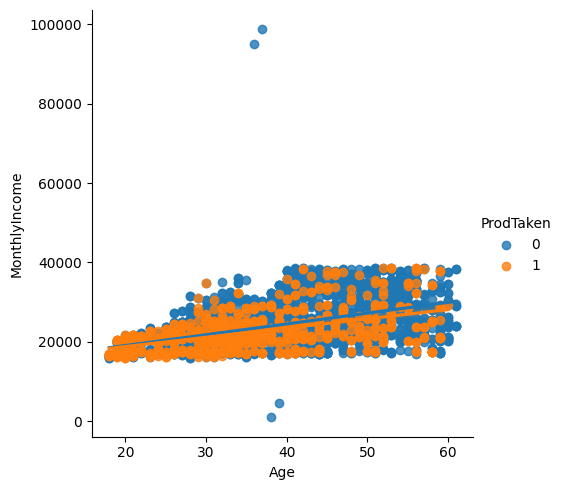

In [82]:
sns.lmplot(x="Age", y="MonthlyIncome", hue="ProdTaken", data=df)

**Above result shows:**

* As the customer's age increases, irrespective of their monthly income , the chance of product taken by customer  decreases. One can notice as the "Age" reaches beyond 45,after that customer shows no interest in buying the package irrespective of their "MonthlyIncome".

* Furthermore, Straight line in the plot shows there is a positive association between "Age" and "MonthlyIncome".

In [83]:
#CALCULATION OF MISSING VALUES
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**Imputation of missing values through mean, median or any other functions.**

In [84]:
# IMPUTATION THROUGH MEAN
df.Age = df["Age"].fillna(df['Age'].mean())

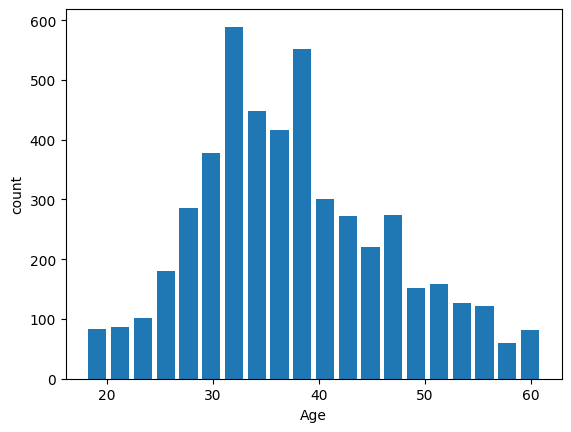

In [85]:
# Histogram count of "Age" column
plt.hist(df.Age,bins=20, rwidth= 0.8)
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

In [86]:
#BACKWARD FILLING IMPUTATION
df.TypeofContact= df['TypeofContact'].fillna(method='bfill')

In [87]:
# IMPUTATION THROUGH MEAN
df.NumberOfChildrenVisiting = df["NumberOfChildrenVisiting"].fillna(df['NumberOfChildrenVisiting'].mean())

In [88]:
# IMPUTATION THROUGH MODE
MODE1 = df['DurationOfPitch'].value_counts().idxmax()
df['DurationOfPitch'].replace(np.nan,MODE1, inplace=True)


In [89]:
# IMPUTATION THROUGH MODE
MODE2 = df['NumberOfFollowups'].value_counts().idxmax()
df['NumberOfFollowups'].replace(np.nan,MODE2, inplace=True)

In [90]:
# IMPUTATION THROUGH MODE
MODE3 = df['PreferredPropertyStar'].value_counts().idxmax()
df['PreferredPropertyStar'].replace(np.nan,MODE3, inplace=True)

In [91]:
# IMPUTATION THROUGH MODE
MODE4 = df['NumberOfTrips'].value_counts().idxmax()
df['NumberOfTrips'].replace(np.nan,MODE4, inplace=True)

In [92]:
# IMPUTATION THROUGH QUADRATIC INTERPOLATION
df["MonthlyIncome"]=df['MonthlyIncome'].interpolate(method='quadratic')

In [93]:
#NUMBER OF MISSING VALUES IN DATASET AFTER IMPUTATIONS
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [94]:
# COLUMN NAMES IN 'df' DATAFRAME
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<b>DATA NORMALISATION FOR COLUMN "MONTHLYINCOME" AS IT CAN CREATE BIASED RESULTS IF NOT HANDLE PROPERLY. </b>

In [95]:
mean_of_monthly_income_=df["MonthlyIncome"].mean()
print(mean_of_monthly_income_)
Std_of_monthly_income_= df["MonthlyIncome"].std()
print(Std_of_monthly_income_)

23568.434327434377
5409.076780115822


In [96]:
df["MonthlyIncome_zScore"]= (df["MonthlyIncome"]- mean_of_monthly_income_)/ Std_of_monthly_income_

In [97]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,MonthlyIncome_zScore
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,-0.476132
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,-0.635679
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,-1.197697
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,-1.046285
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,-0.942940


In [98]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'MonthlyIncome_zScore'],
      dtype='object')

<b>SPLITTING INTO X AND Y TRAINING AND TESTING SETS</b>

In [99]:
X= df[['CustomerID','Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']]
Y= df.ProdTaken

In [100]:
X=X.drop("CustomerID",axis=1)

In [101]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [102]:
# DATA NORMALIZATION USING Z-SCORE METHOD
mean_of_monthly_income=X["MonthlyIncome"].mean()
mean_of_monthly_income

23568.434327434377

In [103]:
Std_of_monthly_income= X["MonthlyIncome"].std()
Std_of_monthly_income

5409.076780115822

In [104]:
X["MonthlyIncome_z"]= (X["MonthlyIncome"]- mean_of_monthly_income)/ Std_of_monthly_income

In [105]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
MonthlyIncome_zScore        float64
dtype: object

In [106]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,MonthlyIncome_z
0,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,-0.476132
1,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,-0.635679
2,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,-1.197697
3,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,-1.046285
4,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,-0.942940


In [107]:
X= X.drop("MonthlyIncome",axis=1)

In [108]:
#X= X.drop('MonthlyIncome_zScore',axis=1)

In [109]:
df[["Designation","ProdTaken","Age"]].value_counts()

Designation     ProdTaken  Age      
Executive       0          37.622265    107
Manager         0          35.000000     84
                           36.000000     83
                           32.000000     82
                           34.000000     82
                                       ... 
                1          28.000000      1
                           22.000000      1
                           21.000000      1
Senior Manager  1          42.000000      1
AVP             0          29.000000      1
Name: count, Length: 308, dtype: int64

In [110]:
X.columns

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome_z'],
      dtype='object')

In [111]:
set(df.Designation)

{'AVP', 'Executive', 'Manager', 'Senior Manager', 'VP'}

<Axes: xlabel='Designation', ylabel='ProdTaken'>

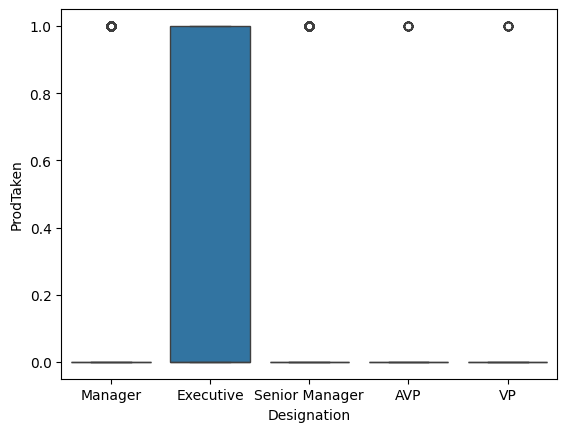

In [112]:
sns.boxplot(x="Designation",y="ProdTaken",data=df)

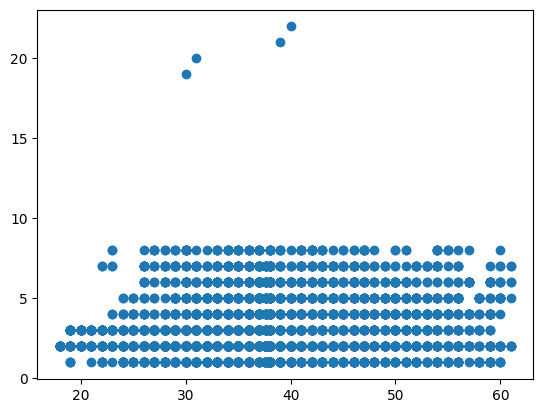

In [113]:
from matplotlib import pyplot as plt
plt.scatter(df["Age"],df["NumberOfTrips"])

<Axes: xlabel='Age', ylabel='NumberOfTrips'>

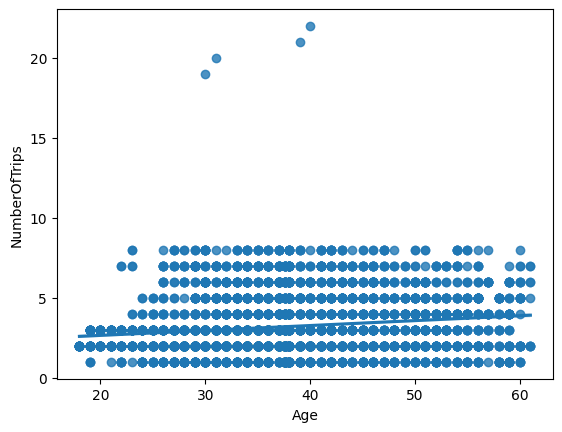

In [114]:
sns.regplot(x='Age',y='NumberOfTrips',data=df)


<Axes: xlabel='Age', ylabel='NumberOfTrips'>

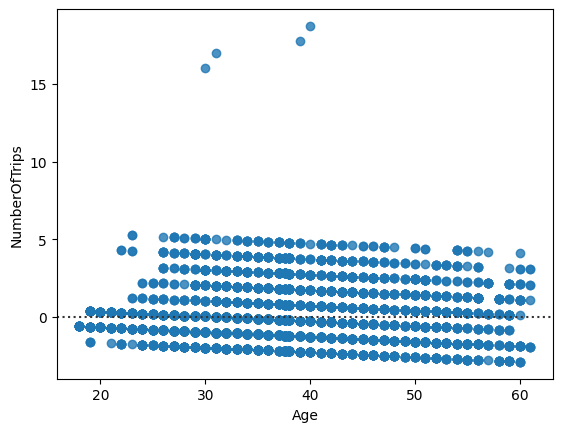

In [115]:
sns.residplot(x='Age',
y='NumberOfTrips', data=df)




>HERE,NumberOfTrips shows values that are missing in dataset or represented in the form of nan.



In [116]:
df.NumberOfTrips.value_counts()

NumberOfTrips
2.0     1604
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: count, dtype: int64

In [117]:
df["NumberOfTrips"].isna().sum()

0

In [118]:
#set(df.NumberOfTrips)

In [119]:
X["NumberOfTrips"].replace(np.nan, 0.0,inplace = True)

<Axes: xlabel='Age', ylabel='NumberOfTrips'>

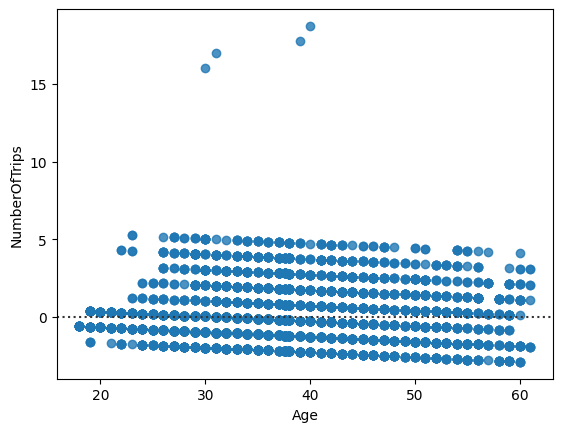

In [120]:
sns.residplot(x=X['Age'],y=X['NumberOfTrips'])


In [121]:
X.isna().sum()

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome_z             0
dtype: int64

In [122]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome_z
0,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,-0.476132
1,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,-0.635679
2,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,-1.197697
3,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,-1.046285
4,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,-0.942940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,0.556022
4884,28.000000,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,-0.435644
4885,52.000000,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,1.525504
4886,19.000000,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,-0.606284


In [123]:
X.Age.value_counts().idxmax()

35.0

In [124]:
X.Age.min()

18.0

In [125]:
X.Age.max()

61.0

In [126]:
# Converting object datatype into int or float
dummy_variable = pd.get_dummies(df['Occupation'])
df = pd.concat([df, dummy_variable],axis = 1)
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,MonthlyIncome_zScore,Free Lancer,Large Business,Salaried,Small Business
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,2,1,0.0,Manager,20993.0,-0.476132,False,False,True,False
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,...,3,1,2.0,Manager,20130.0,-0.635679,False,False,True,False
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3,0,0.0,Executive,17090.0,-1.197697,True,False,False,False
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,...,5,1,1.0,Executive,17909.0,-1.046285,False,False,True,False
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,5,1,0.0,Executive,18468.0,-0.942940,False,False,False,True


In [127]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'MonthlyIncome_zScore', 'Free Lancer', 'Large Business', 'Salaried',
       'Small Business'],
      dtype='object')

In [128]:
set(df.Occupation)

{'Free Lancer', 'Large Business', 'Salaried', 'Small Business'}

In [129]:
from sklearn.preprocessing import OrdinalEncoder

In [130]:
enc = OrdinalEncoder()

In [131]:
X[["Designation","TypeofContact", "Occupation","Gender","MaritalStatus","ProductPitched"]] = enc.fit_transform(X[["Designation","TypeofContact", "Occupation","Gender","MaritalStatus","ProductPitched"]])

In [132]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome_z
0,41.000000,1.0,3,6.0,2.0,1.0,3,3.0,1.0,3.0,2.0,1.0,1,2,1,0.0,2.0,-0.476132
1,49.000000,0.0,1,14.0,2.0,2.0,3,4.0,1.0,4.0,0.0,2.0,0,3,1,2.0,2.0,-0.635679
2,37.000000,1.0,1,8.0,0.0,2.0,3,4.0,0.0,3.0,2.0,7.0,1,3,0,0.0,1.0,-1.197697
3,33.000000,0.0,1,9.0,2.0,1.0,2,3.0,0.0,3.0,0.0,2.0,1,5,1,1.0,1.0,-1.046285
4,37.622265,1.0,1,8.0,3.0,2.0,2,3.0,0.0,4.0,0.0,1.0,0,5,1,0.0,1.0,-0.942940


In [133]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome_z
0,41.000000,1.0,3,6.0,2.0,1.0,3,3.0,1.0,3.0,2.0,1.0,1,2,1,0.0,2.0,-0.476132
1,49.000000,0.0,1,14.0,2.0,2.0,3,4.0,1.0,4.0,0.0,2.0,0,3,1,2.0,2.0,-0.635679
2,37.000000,1.0,1,8.0,0.0,2.0,3,4.0,0.0,3.0,2.0,7.0,1,3,0,0.0,1.0,-1.197697
3,33.000000,0.0,1,9.0,2.0,1.0,2,3.0,0.0,3.0,0.0,2.0,1,5,1,1.0,1.0,-1.046285
4,37.622265,1.0,1,8.0,3.0,2.0,2,3.0,0.0,4.0,0.0,1.0,0,5,1,0.0,1.0,-0.942940


In [134]:
X.columns

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome_z'],
      dtype='object')

**TRAINING AND TESTING DATASET**


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (3910, 18) (3910,)
Test set: (978, 18) (978,)


In [136]:
X_train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome_z
2775,28.0,0.0,3,7.0,3.0,2.0,4,4.0,1.0,4.0,0.0,2.0,1,2,0,3.0,2.0,0.269652
4737,30.0,0.0,1,17.0,2.0,1.0,4,4.0,0.0,4.0,1.0,2.0,0,5,0,1.0,1.0,-0.295695
3778,28.0,0.0,1,22.0,2.0,1.0,4,5.0,0.0,5.0,1.0,2.0,0,4,1,1.0,1.0,-0.021526
4060,31.0,1.0,1,9.0,3.0,2.0,3,5.0,0.0,3.0,3.0,2.0,0,4,0,1.0,1.0,-0.401258
948,30.0,1.0,1,23.0,3.0,1.0,3,3.0,3.0,5.0,0.0,2.0,1,4,0,2.0,3.0,0.618879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,32.0,1.0,1,9.0,2.0,2.0,4,4.0,0.0,3.0,1.0,3.0,0,5,0,3.0,1.0,-0.261308
709,31.0,0.0,1,15.0,3.0,2.0,2,4.0,0.0,5.0,2.0,1.0,1,3,1,0.0,1.0,-1.154991
2487,28.0,0.0,3,15.0,2.0,2.0,3,4.0,3.0,3.0,3.0,3.0,0,2,1,1.0,3.0,0.709098
174,45.0,1.0,3,10.0,2.0,1.0,1,4.0,1.0,5.0,1.0,5.0,1,4,0,0.0,2.0,-0.658603


<b>MACHINE LEARNING MODELING</b>

In [137]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [138]:
#Prediction
from sklearn.metrics import accuracy_score
y_pred = LR.predict(X_test)


In [139]:
#ACCURACY CALCULATION
acc = accuracy_score(Y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 83.33333333333334


In [140]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred, average= "macro")

0.5775579481825193

<b> 2. DECISION TREE IMPLEMENTATION </b>

In [141]:
'''from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree'''

'from sklearn.metrics import confusion_matrix, accuracy_score, classification_report\nfrom sklearn.tree import DecisionTreeClassifier\nimport sklearn.tree as tree'

In [142]:
package_tree= DecisionTreeClassifier(criterion="entropy", max_depth = 10)


In [143]:
package_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [144]:
new_tree= package_tree.predict(X_test)

In [145]:
#ACCURACY CALCULATION
acc_dt = accuracy_score(Y_test, new_tree)
print("Decision Tree model accuracy (in %):", acc_dt*100)

Decision Tree model accuracy (in %): 88.85480572597137


In [146]:
#from sklearn.metrics import f1_score
dt_f1 =  f1_score(Y_test, new_tree, average= "macro")
print("f1-score:",dt_f1*100)

f1-score: 81.07729584365097


<b> 3. KNN IMPLEMENTATION </b>

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
k = 6
#Train Model and Predict
KNN_ = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
KNN_

KNeighborsClassifier(n_neighbors=6)

In [149]:
yhat = KNN_.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [150]:
#ACCURACY CALCULATION
acc_KNN = accuracy_score(Y_test, yhat)
print("KNN model accuracy (in %):", acc_KNN*100)

KNN model accuracy (in %): 85.07157464212679


In [151]:
from sklearn.metrics import f1_score
f1_score(Y_test, yhat, average= "macro")

0.6557566756993933

<b> 4. SVM Implementation </B>

In [152]:
from sklearn import svm
SVM_ = svm.SVC(kernel='rbf')
SVM_.fit(X_train, Y_train)

SVC()

In [153]:
yhat_SVM = SVM_.predict(X_test)

In [154]:
#ACCURACY CALCULATION
acc_SVM = accuracy_score(Y_test, yhat_SVM)
print("SVM model accuracy (in %):", acc_SVM*100)

SVM model accuracy (in %): 81.28834355828221


In [155]:
from sklearn.metrics import f1_score
f1_score(Y_test, yhat_SVM, average= "macro")

0.44839255499153974

<b> 5. NAIVE BAYES CLASSIFIER </b>

In [156]:
from sklearn.naive_bayes import GaussianNB

In [157]:
#Creating a naive bayes classifier
nb_classifier= GaussianNB()
 # Training the classifier
nb_classifier.fit(X_train,Y_train)

 #Making predictions through training data
nb_pred=  nb_classifier.predict(X_test)

 # checking accuracy
acc_nb = accuracy_score(Y_test,nb_pred)

In [158]:
print("Naive Bayes model accuracy (in %):", acc_nb*100)

Naive Bayes model accuracy (in %): 83.94683026584867


In [159]:
from sklearn.metrics import f1_score
f1_score(Y_test, nb_pred, average= "macro")

0.6966950654132502

<b> 6. RANDOM FOREST CLASSIFIER</b>

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
acc_rf = accuracy_score(Y_test, y_pred_rf)
classification_rep = classification_report(Y_test, y_pred_rf)

In [162]:
print("Random forest model accuracy (in %):", acc_rf*100)

Random forest model accuracy (in %): 93.66053169734151


In [163]:
from sklearn.metrics import f1_score
rf_f1= f1_score(Y_test, y_pred_rf, average= "macro")
print("f1-score:",rf_f1*100)

f1-score: 88.41763447432763


<b> 8. BOOSTING TECHNIQUES: GRADIENT BOOSTING </b>

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
# Instantiating Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# Fit to training set
gbc.fit(X_train, Y_train)

# Predict on test set
pred_y = gbc.predict(X_test)

# accuracy
acc_gb = accuracy_score(Y_test, pred_y)

In [166]:
print(" Gradient Boost model accuracy (in %):", acc_gb*100)

 Gradient Boost model accuracy (in %): 86.60531697341514


In [167]:
from sklearn.metrics import f1_score
f1_score(Y_test, pred_y, average= "macro")

0.7211546623311329

<b> 9. BOOSTING TECHNIQUE: ADABOOST </b>

In [168]:
from sklearn.ensemble import AdaBoostClassifier

In [169]:
# Creating adaboost classifier model
adb = AdaBoostClassifier()
adb.fit(X_train,Y_train)

AdaBoostClassifier()

In [170]:
predict_ada= adb.predict(X_test)

In [171]:
acc_ada = accuracy_score(Y_test, predict_ada)

In [172]:
print(" Ada Boost model accuracy (in %):", acc_ada*100)

 Ada Boost model accuracy (in %): 85.17382413087935


In [173]:
f1_score(Y_test, predict_ada, average= "macro")

0.695086683452201

<b> 10. Boosting Technique : XGboostClassifier


In [174]:
from xgboost import XGBClassifier

In [175]:
# Creating xgboost classifier model
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [176]:
predict_xgb= XGB.predict(X_test)

In [177]:
classification_report(Y_test,predict_xgb)

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.96       795\n           1       0.92      0.75      0.83       183\n\n    accuracy                           0.94       978\n   macro avg       0.93      0.87      0.90       978\nweighted avg       0.94      0.94      0.94       978\n'

In [178]:
acc_xgb = accuracy_score(Y_test, predict_xgb)
acc_xgb *100

94.1717791411043

In [179]:
from sklearn.metrics import f1_score
xgb_f1= f1_score(Y_test, predict_xgb, average= "macro")
print("f1:", xgb_f1 *100)

f1: 89.6854340477261


<B> 11. BOOSTING TECHNIQUE: CATBOOST

In [180]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [181]:
from catboost import CatBoostClassifier
cb= CatBoostClassifier()
cb.fit(X_train, Y_train)

Learning rate set to 0.018441
0:	learn: 0.6808287	total: 49.1ms	remaining: 49.1s
1:	learn: 0.6710064	total: 51.3ms	remaining: 25.6s
2:	learn: 0.6597440	total: 53.5ms	remaining: 17.8s
3:	learn: 0.6473395	total: 55.6ms	remaining: 13.9s
4:	learn: 0.6367248	total: 57.7ms	remaining: 11.5s
5:	learn: 0.6262637	total: 60.1ms	remaining: 9.96s
6:	learn: 0.6152186	total: 62.4ms	remaining: 8.85s
7:	learn: 0.6054663	total: 65ms	remaining: 8.06s
8:	learn: 0.5972960	total: 67ms	remaining: 7.38s
9:	learn: 0.5893000	total: 69.4ms	remaining: 6.87s
10:	learn: 0.5804530	total: 71.7ms	remaining: 6.45s
11:	learn: 0.5721318	total: 74.1ms	remaining: 6.1s
12:	learn: 0.5644553	total: 76.5ms	remaining: 5.81s
13:	learn: 0.5574999	total: 78.8ms	remaining: 5.55s
14:	learn: 0.5526639	total: 80.3ms	remaining: 5.27s
15:	learn: 0.5460450	total: 82.8ms	remaining: 5.09s
16:	learn: 0.5389694	total: 85.2ms	remaining: 4.92s
17:	learn: 0.5319105	total: 87.5ms	remaining: 4.77s
18:	learn: 0.5246617	total: 89.8ms	remaining: 4.6

In [182]:
y_cat = cb.predict(X_test)

In [183]:
acc_cb = accuracy_score(Y_test, y_cat)

In [184]:
print("CatBoost model accuracy (in %):", acc_cb*100)

CatBoost model accuracy (in %): 91.71779141104295


In [185]:
f1_score(Y_test, predict_ada, average= "macro")

0.695086683452201

<b> 12. BOOSTING TECHNIQUE: LIGHTGBM

In [186]:
!pip install lightgbm

In [187]:
#import lightgbm as lgb

# Training a LightGBM Classifier
from lightgbm import LGBMClassifier

# Initialize a LightGBM Classifier with 'auc' as the evaluation metric
lbm= LGBMClassifier()

# Fit the model on the training data
lbm.fit(X_train, Y_train)

# Make predictions on the training and validation sets
y_train = lbm.predict(X_train)

[LightGBM] [Info] Number of positive: 737, number of negative: 3173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 3910, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.188491 -> initscore=-1.459845
[LightGBM] [Info] Start training from score -1.459845


In [188]:
y_lgbm = lbm.predict(X_test)

In [189]:
acc_lgbm = accuracy_score(Y_test, y_lgbm)

In [190]:
print("Light Gradient Boost model accuracy (in %):", acc_lgbm*100)

Light Gradient Boost model accuracy (in %): 92.43353783231085


In [191]:
from sklearn.metrics import f1_score
lbm_f1=f1_score(Y_test, y_lgbm, average= "macro")
print("F1_score:",lbm_f1*100)

F1_score: 85.81664249598245


<b> 13. STACKING IMPLEMETATION

In [192]:
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

In [193]:
stack= StackingClassifier(classifiers=[lbm,package_tree,XGB],use_probas= True, meta_classifier=rf_classifier)

In [194]:
force_row_wise= True
for sc, algo in zip([lbm,package_tree,XGB,stack],
                    ["LightBoostModel","Decision Tree","XGB Boosting","Stacking Classifier"]):
  scores= model_selection.cross_val_score(sc,X,Y, cv= 160, scoring="f1_macro")
  scores1= model_selection.cross_val_score(sc, X_train, Y_train, cv= 160, scoring= "accuracy",error_score="raise")
  print("F1 Scores: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(),algo))
  print(" Accuracy: %0.3f [%s]" % (scores1.mean(),algo))

Streaming output truncated to the last 5000 lines.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 4857, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.188182 -> initscore=-1.461867
[LightGBM] [Info] Start training from score -1.461867
[LightGBM] [Info] Number of positive: 914, number of negative: 3943
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 4857, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.188182 -> initscore=-1.461867
[LightGBM] [Info] Start training from score -1.461867
[LightGBM] [Inf

<b>15.BLENDING TECHNIQUE

In [195]:
# Base model introduction in our algorithm
def add_algorithms():
  algorithms= list()
  algorithms.append(("rmf", RandomForestClassifier()))
  algorithms.append(("lgb", LGBMClassifier()))
  algorithms.append(("Xgb",  XGBClassifier()))
  algorithms.append(("dcf", DecisionTreeClassifier()))
  return algorithms

In [196]:
# fit the blending ensemble
def fit_ensemble(algorithms, x_train, x_valid, y_train, y_valid):
  meta_model= list()
  for name, algorithm in algorithms:
    # fit the algorithm
    algorithm.fit(x_train, y_train)
    # make predictions
    yhat= algorithm.predict(x_valid)
    #converting it into a matrix for further processing
    yhat= yhat.reshape(len(yhat),1)
    # store predictions as input for the blending model
    meta_model.append(yhat)
  # create 2d array from predictions,
  meta_model= hstack(meta_model)
  # define blending model
  blending= RandomForestClassifier()  #meta model
# fit on predictions from base models
  blending.fit(meta_model, y_valid)
  return blending

In [197]:
def predict_ensemble(algorithms, blending, x_test):
  meta_model= list()
  for name, algorithm in algorithms:
    # make predictions with the base models
    yhat= algorithm.predict(x_test)
    yhat= yhat.reshape(len(yhat),1)
    # store predictions as input for the blending model
    meta_model.append(yhat)
  # create 2d array from predictions,
  meta_model= hstack(meta_model)
  # predict
  return blending.predict(meta_model)

In [198]:
x_train_full, x_test, y_train_full, y_test= train_test_split(X,Y, test_size=0.40, random_state=1)
# splitting further training set into train and validation sets
x_train, x_valid, y_train, y_valid= train_test_split(x_train_full, y_train_full, test_size=0.40, random_state=1)
print('Train: %s, Validation: %s, Test: %s' % (x_train.shape, x_valid.shape, x_test.shape))
algorithms = add_algorithms()
# fit the blending ensemble
blending = fit_ensemble(algorithms, x_train, x_valid, y_train, y_valid)
# make predictions on test set
yhat= predict_ensemble(algorithms, blending, x_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score*100))
f1= f1_score(y_test, yhat, average= "macro")
print("f1_score:",f1 *100)

Train: (1759, 18), Validation: (1173, 18), Test: (1956, 18)
[LightGBM] [Info] Number of positive: 315, number of negative: 1444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 1759, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.179079 -> initscore=-1.522600
[LightGBM] [Info] Start training from score -1.522600
Blending Accuracy: 87.679
f1_score: 77.46077237434179


# CONCLUSION:
After performing EDA and applying different Machine Learning models, Top 5 algorithms(unsorted) are:

1. Random Forest classifier, with accuracy = 93.66% and F1_score = 88.41%.

2. Decision Tree Classifier, with accuracy = 89.36% and f1_score= 81.82%.

3. Light Gradient Boost Classifier, with accuracy= 92.43% and f1_score= 85.81%.

4. XGB Classifier, with accuracy= 94.17% and f1_score= 89.68%.

5. Stacking Classifier, with accuracy= 94.1% and f1-score= 94.0(+/-8.0).

It is evident that in all the cases Ensemble techniques way more better than other algorithms, further Stacking classifier works best but with huge Time Complexity than others.

Overall, XGBoost works best among all of them with no issues in space and time complexity.

